<a href="https://colab.research.google.com/github/ranggawardhana/Reprocessing-Data/blob/master/PrediksiKelMhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe,cat_pipe

In [20]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
df=pd.read_csv('dataset.csv',delimiter=';')
df

jenis_kelamin pekerjaan   status   ipk      lulus
0           laki       mhs    belum  3.17      tepat
1           laki   bekerja    belum  3.30      tepat
2      perempuan       mhs    belum  3.01      tepat
3      perempuan       mhs  menikah  3.25      tepat
4           laki   bekerja  menikah  3.20  terlambat
5           laki   bekerja  menikah  2.50  terlambat
6      perempuan   bekerja  menikah  3.00  terlambat
7      perempuan   bekerja    belum  2.70  terlambat
8           laki   bekerja    belum  2.40  terlambat
9      perempuan       mhs  menikah  2.50  terlambat
10     perempuan       mhs    belum  2.50  terlambat
11     perempuan       mhs    belum  3.50      tepat
12          laki   bekerja  menikah  3.30      tepat
13          laki       mhs  menikah  3.25      tepat
14          laki       mhs    belum  2.30  terlambat

In [23]:
x=df.drop(columns='lulus')
y=df.lulus

In [24]:
y

0         tepat
1         tepat
2         tepat
3         tepat
4     terlambat
5     terlambat
6     terlambat
7     terlambat
8     terlambat
9     terlambat
10    terlambat
11        tepat
12        tepat
13        tepat
14    terlambat
Name: lulus, dtype: object

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,\
                                                 random_state=42)
x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15, 4), (15,), (12, 4), (3, 4), (12,), (3,))

In [26]:
parameter=ColumnTransformer([
    ('numeric',num_pipe(),['ipk']),
    ('categorical',cat_pipe(encoder='onehot'),
     ['jenis_kelamin','pekerjaan','status'])
])

In [27]:
from sklearn.naive_bayes import GaussianNB
pipeline=Pipeline([
    ('prep',parameter),
    ('algo',GaussianNB())
])

In [28]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ipk']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['jenis_kelamin', 'pekerjaan',
                                                   'status'])])),
                ('algo', GaussianNB())])

In [29]:
pipeline.score(x_train,y_train)

0.9166666666666666

In [30]:
pipeline.score(x_test,y_test)

1.0

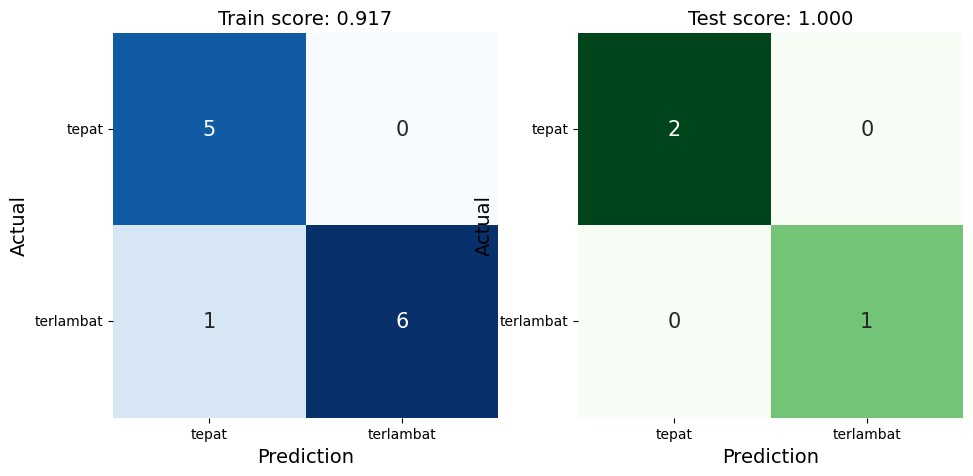

In [31]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train,y_train,x_test,y_test,pipeline)

# Mulai Prediksi Data

In [33]:
x_pred=pd.read_csv('testing.csv',delimiter = ';')
x_pred

jenis_kelamin pekerjaan status  ipk
0          laki       mhs  belum  2.7

In [34]:
pipeline.predict(x_pred)

array(['terlambat'], dtype='<U9')

In [35]:
x_pred['Prediksi-lulus']=pipeline.predict(x_pred)
x_pred

jenis_kelamin pekerjaan status  ipk Prediksi-lulus
0          laki       mhs  belum  2.7      terlambat